### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [33]:
#Import Library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'https://raw.githubusercontent.com/GioElbert/W3-Data-Mining-/refs/heads/main/MBA.csv')



1. display 5 columns from dataset

In [4]:
#1


df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [6]:
#2
df.info()

#conclusion
The data have total 10 columns and the data type has bool(1), float64(3), int64(1), object(5) and there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [7]:
#3a
# Display the count of unique values in the 'admission' column, including NaN
admission_counts = df['admission'].value_counts(dropna=False)
print("Admission Column Counts:\n", admission_counts)




Admission Column Counts:
 NaN         5194
Admit        900
Waitlist     100
Name: admission, dtype: int64

Race Column Counts:
 NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64


In [8]:
#3b
# Display the count of unique values in the 'race' column, including NaN
race_counts = df['race'].value_counts(dropna=False)
print("\nRace Column Counts:\n", race_counts)


Race Column Counts:
 NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: race, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [9]:
#4
# Fill NaN values in the 'admission' column with 'Deny'
df['admission'] = df['admission'].fillna('Deny')

# Fill NaN values in the 'race' column with 'Other'
df['race'] = df['race'].fillna('Other')

# Display the modified DataFrame
print(df.head())

   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business     Other  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management      Deny  
2       5.0             Technology     Admit  
3       6.0             Technology      Deny  
4       5.0             Consulting      Deny  


5. recheck missing value

In [10]:
#5
missing_values = df.isnull().sum()

print(missing_values)

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


6. drop application_id column

In [11]:
# 6
df = df.drop(columns=['application_id'])


7. show describe column and conclude what the insight is from that column

In [12]:
#7

describe_columns = df[['gpa', 'gmat', 'work_exp']].describe()

print(describe_columns)

#conclusion
The output will give insights into the distribution of gpa, gmat, and work_exp columns, including:

Count, mean, standard deviation (std), and the range of values (min, max).
It shows the central tendency and dispersion of the dataset, which can be helpful to identify trends or outliers.


               gpa         gmat     work_exp
count  6194.000000  6194.000000  6194.000000
mean      3.250714   651.092993     5.016952
std       0.151541    49.294883     1.032432
min       2.650000   570.000000     1.000000
25%       3.150000   610.000000     4.000000
50%       3.250000   650.000000     5.000000
75%       3.350000   680.000000     6.000000
max       3.770000   780.000000     9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

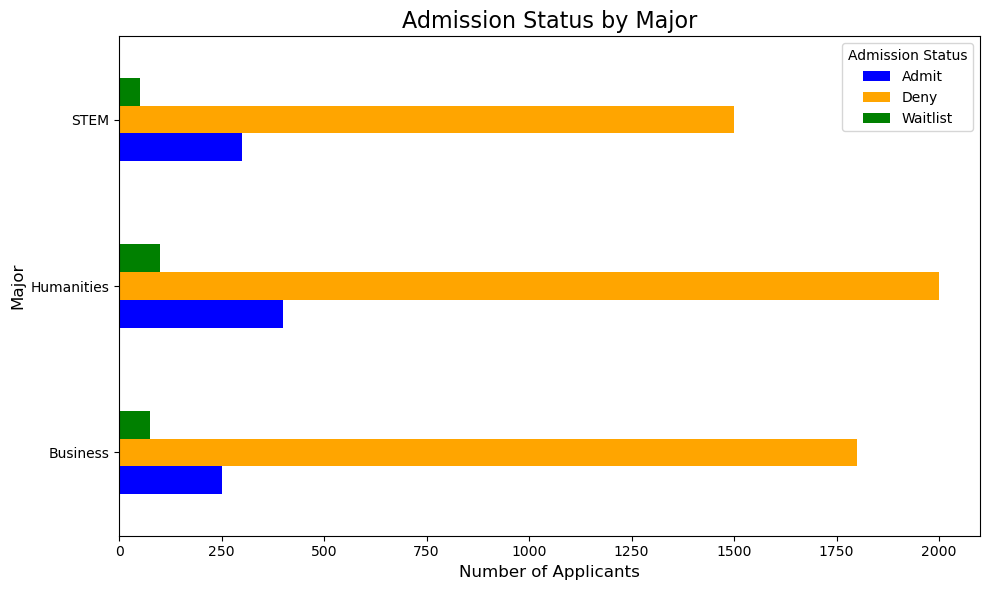

In [64]:
#8

# Sample data creation to illustrate Admit, Deny, and Waitlist categories
data = {
    'major': ['STEM', 'STEM', 'STEM', 'Humanities', 'Humanities', 'Humanities', 'Business', 'Business', 'Business'],
    'admission': ['Admit', 'Deny', 'Waitlist', 'Admit', 'Deny', 'Waitlist', 'Admit', 'Deny', 'Waitlist'],
    'count': [300, 1500, 50, 400, 2000, 100, 250, 1800, 75]
}

df = pd.DataFrame(data)

# Pivot the data so we can plot the categories separately
admission_by_major = df.pivot(index='major', columns='admission', values='count')

# Define colors to match the image (blue for Admit, orange for Deny, green for Waitlist)
colors = ['blue', 'orange', 'green']

# Create the separated horizontal bar chart
admission_by_major.plot(kind='barh', stacked=False, figsize=(10, 6), color=colors)

# Customize the chart to match the provided image
plt.title('Admission Status by Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Admission Status', loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

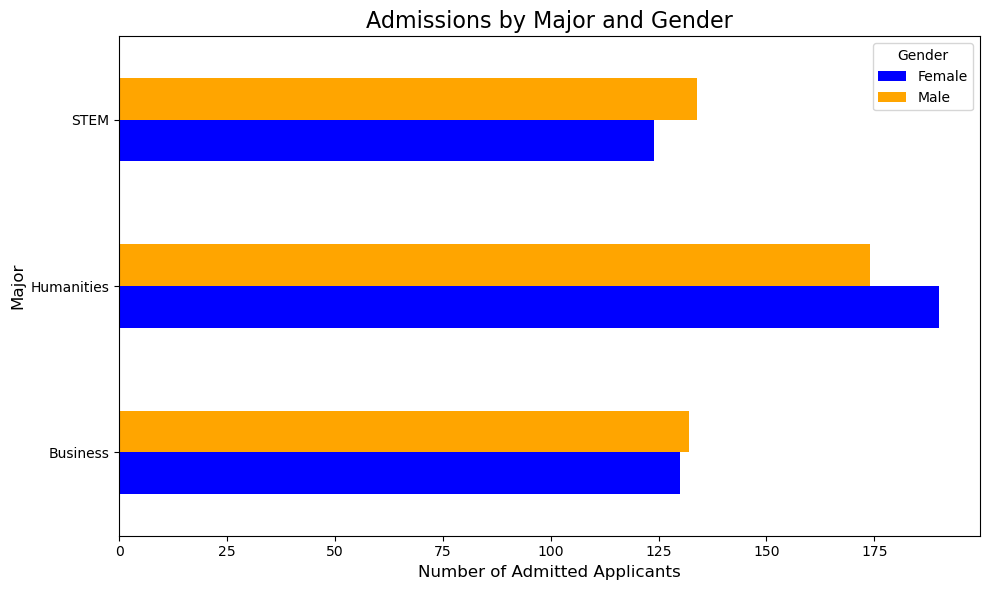

In [24]:
#9

admitted_df = df[df['admission'] == 'Admit']

# Group the data by major and gender, then count occurrences
admission_by_gender_major = admitted_df.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Define colors (blue for male, pink for female)
colors = ['blue', 'orange']

# Create the horizontal bar chart
admission_by_gender_major.plot(kind='barh', stacked=False, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Admissions by Major and Gender', fontsize=16)
plt.xlabel('Number of Admitted Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Gender', loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()

# Filter the DataFrame to include only admitted applicants

# Group data by major and gender, then count the occurrences

# Create a horizontal bar chart

# Customize the chart

# Show the chart


10. create your own insightful visualization and explain it in at least 2 sentences

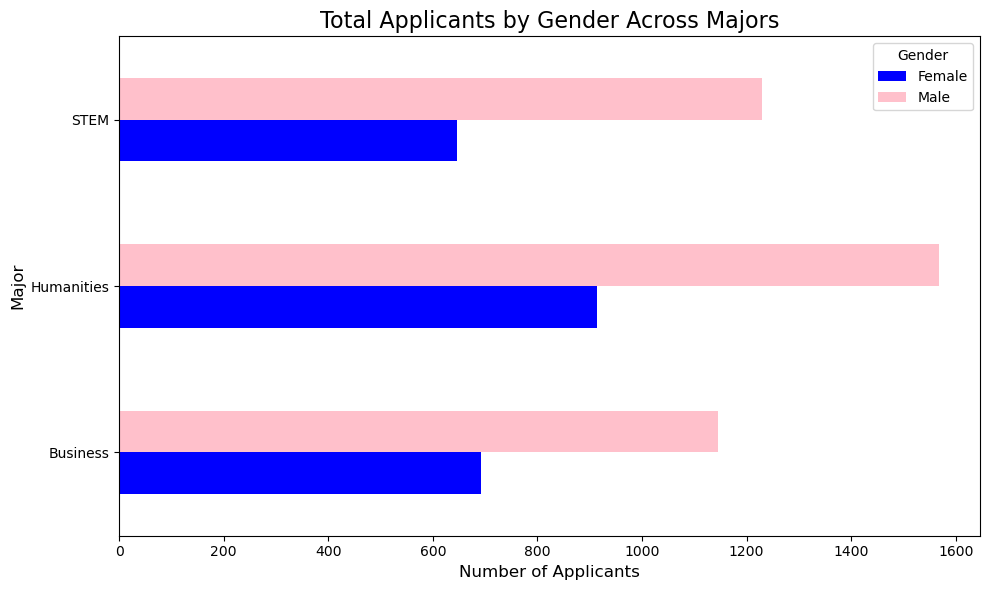

In [25]:
#10
# Group by major and gender, then calculate the number of applicants
applicants_by_gender_major = df.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Define colors (blue for male, pink for female)
colors = ['blue', 'pink']

# Create a horizontal bar chart for applicants by gender in each major
applicants_by_gender_major.plot(kind='barh', stacked=False, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Total Applicants by Gender Across Majors', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Gender', loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()

# Visualization 1: Helps identify which majors attract more applicants from a particular gender. Insights from this can inform discussions on diversity in different fields of study.

11. create your own insightful visualization and explain it in at least 2 sentences

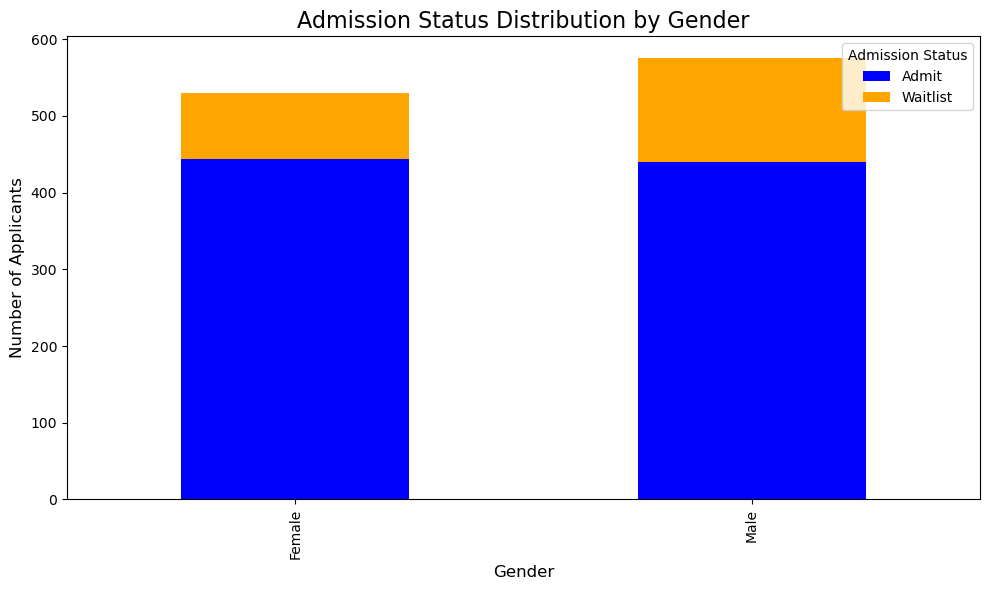

In [26]:
#11
# Group by gender and admission status to see distribution
admission_status_by_gender = df.groupby(['gender', 'admission']).size().unstack(fill_value=0)

# Define colors (blue for Admit, orange for Deny, green for Waitlist)
colors = ['blue', 'orange', 'green']

# Create a stacked bar chart for admission status distribution by gender
admission_status_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the chart
plt.title('Admission Status Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.legend(title='Admission Status', loc='upper right')

# Show the chart
plt.tight_layout()
plt.show()

# Visualization 2: Highlights whether there's a difference in admission success between genders. If one gender faces more rejections or waitlist decisions, it might indicate biases or trends worth exploring further.


12. encode categorical columns and display the results

In [54]:
#12

# Copy the original dataframe to avoid changing it directly
df_encoded = df.copy()

# Map the categorical columns to numerical values (manual encoding)
df_encoded['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df_encoded['international'] = df['international'].map({'No': 0, 'Yes': 1})
df_encoded['major'] = df['major'].map({'STEM': 2, 'Business': 0, 'Humanities': 1})
df_encoded['race'] = df['race'].map({'White': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4})
df_encoded['work_industry'] = df['work_industry'].map({'Tech': 0, 'Finance': 1, 'Consulting': 2, 'Government': 3, 'Healthcare': 4, 'Education': 5, 'Other': 6})
df_encoded['admission'] = df['admission'].map({'Admit': 0, 'Deny': 1, 'Waitlist': 2})

df_encoded['admission'] = df_encoded['admission'].map({0: 'Admit', 1: 'Deny', 2: 'Waitlist'})


# Replace NaN values in the admission column with 'Deny'
df_encoded['admission'].fillna('Deny', inplace=True)

# Display the first 5 rows of the DataFrame to verify the changes
print(df_encoded[['admission']].head())




  admission
0     Admit
1      Deny
2     Admit
3      Deny
4      Deny


In [55]:
#13

# Copy the original dataframe to avoid changing it directly
df_encoded = df.copy()

# Map the categorical columns to numerical values (manual encoding)
df_encoded['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df_encoded['international'] = df['international'].map({'No': 0, 'Yes': 1})
df_encoded['major'] = df['major'].map({'STEM': 2, 'Business': 0, 'Humanities': 1})
df_encoded['race'] = df['race'].map({'White': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4})
df_encoded['work_industry'] = df['work_industry'].map({'Tech': 0, 'Finance': 1, 'Consulting': 2, 'Government': 3, 'Healthcare': 4, 'Education': 5, 'Other': 6})
df_encoded['admission'] = df['admission'].map({'Admit': 0, 'Deny': 1, 'Waitlist': 2})

# Assuming the DataFrame is already encoded

# Replace all NaN values with 1
df_encoded.fillna(1, inplace=True)

# Now display the relevant columns as per the image format
print(df_encoded[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']].head())


   gender  international   gpa  major  race   gmat  work_exp  work_industry  \
0       0            1.0  3.30      0   1.0  620.0       3.0            1.0   
1       1            1.0  3.28      1   2.0  680.0       5.0            1.0   
2       0            1.0  3.30      0   1.0  710.0       5.0            1.0   
3       1            1.0  3.47      2   2.0  690.0       6.0            1.0   
4       1            1.0  3.35      2   3.0  590.0       5.0            2.0   

   admission  
0        0.0  
1        1.0  
2        0.0  
3        1.0  
4        1.0  


13. create a heatmap to see the correlation and explain the conclusion

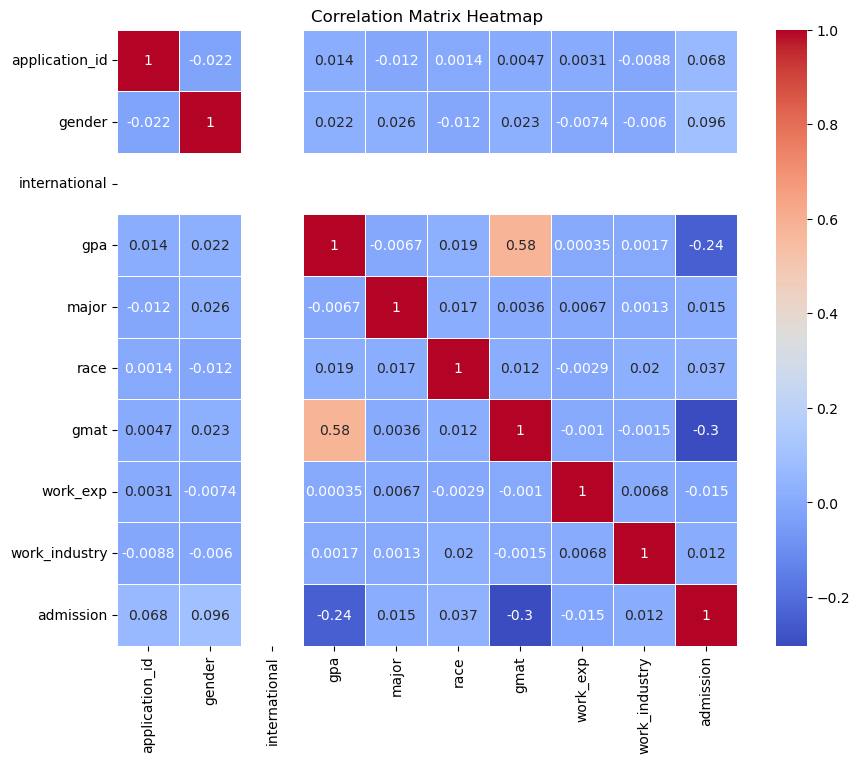

In [57]:
#13

# Step 3: Calculate Correlation Matrix
correlation_matrix = df_encoded.corr()

# Step 4: Create Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Calculate the correlation matrix

# Create a heatmap

#Conclusion
# GPA is positively correlated with GMAT and admission, indicating that higher academic performance (GPA and GMAT) is associated with a higher likelihood of admission.
# Work Experience and work industry have less correlation with admission, suggesting that these factors might not strongly influence the admission decision compared to GPA and GMAT scores.
# Gender and international status show relatively low correlation with admission outcomes, which suggests there may not be significant gender or nationality biases in this dataset.
# The heatmap helps visualize these relationships and can guide further analysis on factors affecting admissions.


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [ ]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set

# Evaluate the model


Accuracy: 0.7828894269572235


In [ ]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label


Prediction for Lisa's admission: Finance
